C:\Users\wyy\AppData\Local\Temp\ipykernel_3044\4081264602.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[a,b,c,n_features]=np.random.RandomState(self.random_state).choice(
C:\Users\wyy\AppData\Local\Temp\ipykernel_3044\4081264602.py:105: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.final_centeroids=centeroids[int(final_n_init),int(final_n_iter)-1,:,:]
C:\Users\wyy\AppData\Local\Temp\ipykernel_3044\4081264602.py:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated N

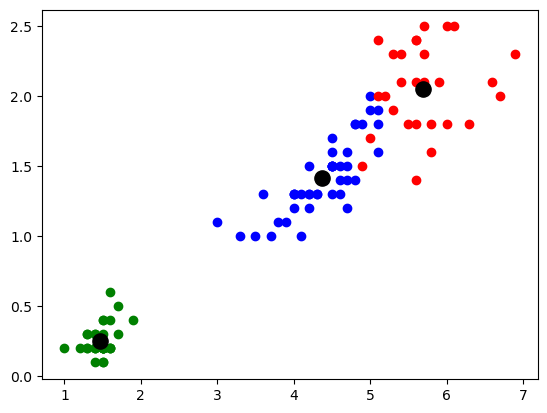

array([2, 3])

In [33]:
class KMeans:
    n_clusters=None
    init=None
    n_init=None
    max_iter=None
    tol=None
    random_state=None
    def __init__(self,n_clusters,init='k-means++',n_init='auto',max_iter=300,tol=1e-4,random_state=None):
# Define 'auto' of n_init
        if n_init=='auto':
            if init=='random':
                self.n_init=10
            elif init=='k-means++':
                self.n_init=1
            else:print("Error:The input 'init' should be either 'random' or 'k_means++'.")
                
        else:
            self.n_init=n_init
        self.n_clusters=n_clusters
        self.init=init
        self.tol=tol
        self.max_iter=max_iter
        self.random_state=random_state
# KMeans.fit
    def fit(self,x):
        import numpy as np
        import pandas as pd
        import random
# Make sure input x is array
        if isinstance(x,np.ndarray):
# Define basic variables
            sample_size=len(x)
            n_features=len(x[0])
            catagories=np.arange(self.n_clusters)
            n_catagories=len(catagories)
# Define an empty 4-dimension matrix to contain calculated data
            data=np.full((self.n_init,self.max_iter,sample_size,n_features+1+self.n_clusters),np.nan)
# Define an empty 4-dimension matrix to contain the feature values of centoroids
            centeroids=np.full((self.n_init,self.max_iter,self.n_clusters,n_features),np.nan)
# Define an empty 1-dimension matrix and an 2-dimension matrix to contain the values of inertia and total inertia
            inertia=np.full((self.n_init,self.n_clusters),np.nan)
            total_inertia=np.full(self.n_init,np.nan)
            n_iter=np.full(self.n_init,0)
# Fill data with x
            data[:,:,:,:n_features]=x
# Select the initial points of cluster centers
            x_index=range(sample_size)
            if self.init=='random':
                random=np.random.RandomState(self.random_state).choice(x_index,self.n_clusters*self.n_init,replace=False)
                for i in range(self.n_init):
                    centeroids[i,0,:,:]=x[random[i*self.n_clusters:(i+1)*self.n_clusters]]         
            elif self.init=='k-means++':
                for i in range(self.n_init):
                    random=np.random.RandomState(self.random_state).choice(x_index,1,replace=False)
                    centeroids[i,0,0,:]=x[random]
                    for j in range(self.n_clusters-1):
                        min_distance=np.full(sample_size,np.nan)
                        probs=np.full(sample_size,np.nan)
                        for k in range(sample_size):
                            min_distance[k]=np.sqrt(np.sum((x[k]-centeroids[i,0,:j+1,:])**2))
                            min_distance[k]=np.min(min_distance[k])
                        for l in range(sample_size):
                            probs[l]=min_distance[l]/np.sum(min_distance)
                        cusum_probs=np.cumsum(probs)
                        n=0
                        while True:
                            n=n+1
                            random2=np.random.RandomState(n).random(1)
                            for n in range(len(probs)):
                                if random2<=cusum_probs[n]:
                                    centeroids[i,0,j+1,:]=x[n]
                                    break
                            if np.all(centeroids[i,0,j+1,:]==centeroids[i,0,j,:])==False:
                                break
            else:
                print("Error:The input 'init' should be either 'random' or 'k_means++'.")
# Calculate the distance between points and centeroids and the predictions and the next centeroids and the number of iterarions
            for a in range(self.n_init):
                for b in range(self.max_iter):
                    if np.sqrt(np.sum((centeroids[a,b,:,:]-centeroids[a,b-1,:,:])**2))<self.tol:
                        break
                    else:
                        n_iter[a]=n_iter[a]+1
                        for c in range(sample_size):
                            for d in range(self.n_clusters):
                                data[a,b,c,n_features+1+d]=np.sqrt(np.sum((x[c]-centeroids[a,b,d,:])**2))
                            centeroids_points_distance=data[a,b,c,n_features+1:n_features+1+self.n_clusters]
                            data[a,b,c,n_features]=np.random.RandomState(self.random_state).choice(
                            catagories[centeroids_points_distance==np.min(centeroids_points_distance)],1,replace=False)
                        for di in range(self.n_clusters):
                            centeroids[a,b+1,di,:]=np.mean(x[data[a,b,:,n_features]==catagories[di]],axis=0)
# Caculate the inertia and total inertia
            for A in range(self.n_init):
                for D in range(self.n_clusters):
                    inertia[A,D]=np.sum((x[data[A,n_iter[A]-1,:,n_features]==catagories[D]]-centeroids[A,n_iter[A]-1,D,:])**2)
                total_inertia[A]=np.sum(inertia[A])
            final_n_iter=np.random.RandomState(self.random_state).choice(n_iter[total_inertia==np.min(total_inertia)],1)
            final_n_init=np.random.RandomState(self.random_state).choice(np.arange(self.n_init)[total_inertia==np.min(total_inertia)],1)
        else:
            print("Error:The input 'x' should be array.")
        self.centeroids_points_distance=centeroids_points_distance
        self.catagories=catagories
        self.data=data
        self.centeroids=centeroids
        self.final_centeroids=centeroids[int(final_n_init),int(final_n_iter)-1,:,:]
        self.inertia=inertia
        self.total_inertia=total_inertia
        self.n_iter=n_iter
        self.final_n_iter=int(final_n_iter)
        self.final_n_init=int(final_n_init)
        self.pred=np.ravel(data[final_n_init,final_n_iter-1,:,n_features])
    def predict(self,x):
        return print(self.pred)      
    def scatter_plot(self,x):
        import matplotlib.pyplot as plt
        import itertools
# Caculate all the cases of the two-element-combinations of features to draw scatter plots under different two features and select one best graph 
# that has greatest distance sum between each two-element-combination of centeroids
        def two_comb(number):
            permutations = list(itertools.permutations(np.arange(number)))
            permu=np.array([permutation for permutation in permutations])
            return np.unique(permu[:,:2],axis=0)
        import numpy as np
        center_distance=np.full((len(two_comb(len(x[0]))),len(two_comb(self.n_clusters))),np.nan)
        for a,i in enumerate(two_comb(len(x[0]))):
            for b,j in enumerate(two_comb(self.n_clusters)):
                center_distance[a,b]=np.sqrt(np.sum((self.final_centeroids[j[0],i]-self.final_centeroids[j[1],i])**2))
        sum_center_distance=np.sum(center_distance,axis=1)
        final_two_comb=two_comb(len(x[0]))[sum_center_distance==np.max(sum_center_distance)]
        final_two_comb_index=np.random.RandomState(123).choice(np.arange(len(final_two_comb)),1)
        final_two_comb=np.ravel(final_two_comb[final_two_comb_index])
# Draw scatter plot
        all_colors=' '.join('bgrcmy').split()
        colors=all_colors[:self.n_clusters]
        fig,ax=plt.subplots()
        for color,k in zip(colors,range(self.n_clusters)):
            ax.scatter(x[:,final_two_comb[0]][self.pred==self.catagories[k]],x[:,final_two_comb[1]][self.pred==self.catagories[k]],
                       color=color)
            ax.scatter(self.final_centeroids[k,final_two_comb[0]],self.final_centeroids[k,final_two_comb[1]],color='k',s=120)
        self.final_two_comb=final_two_comb
        return plt.show()

                  
            
# test  
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
x=load_iris().data
y=load_iris().target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
clf=KMeans(3,random_state=123)
clf.fit(x_train)
clf.scatter_plot(x_train)
clf.final_two_comb

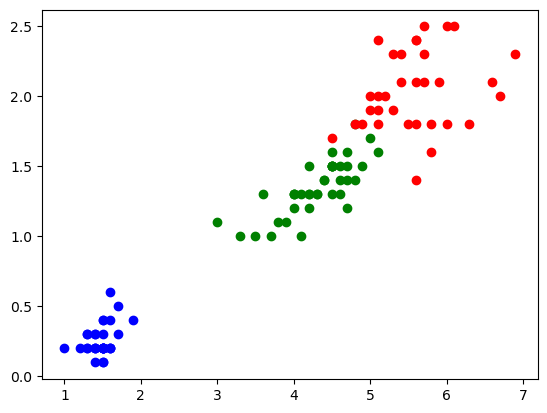

In [35]:
# Show the graph of truth class of data 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
x=load_iris().data
y=load_iris().target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
all_colors=' '.join('bgrcmy').split()
colors=all_colors[:3]
fig,ax=plt.subplots()
for color,k in zip(colors,range(3)):
    ax.scatter(x_train[:,2][y_train==k],x_train[:,3][y_train==k],
                       color=color)
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


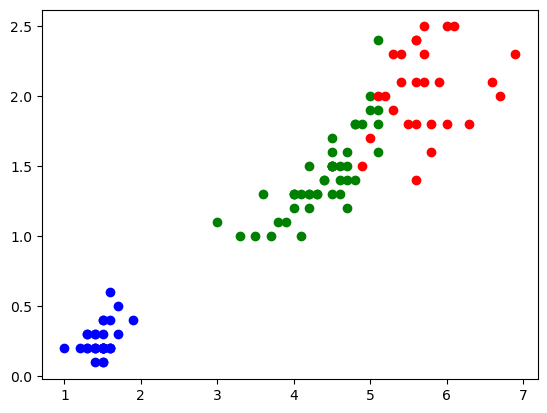

In [37]:
# Show the graph of clustering result of data by sklearn.cluster.KMeans()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
x=load_iris().data
y=load_iris().target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
clf=KMeans(3,init='random')
y=clf.fit_predict(x_train)
import matplotlib.pyplot as plt
all_colors=' '.join('bgrcmy').split()
colors=all_colors[:3]
fig,ax=plt.subplots()
for color,k in zip(colors,range(3)):
    ax.scatter(x_train[:,2][y==k],x_train[:,3][y==k],
                       color=color)
plt.show()